[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WarrenTseng/genai_tutorials/blob/main/MONAI/Brain_LDM/MONAI_GenAI_15mins.ipynb)

## Install Requirements

In [1]:
!pip install monai fire 
!pip install --upgrade --no-cache-dir gdown 
!pip install transformers
!git clone https://github.com/Project-MONAI/GenerativeModels.git
%cd GenerativeModels/
!python setup.py install

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
fatal: destination path 'GenerativeModels' already exists and is not an empty directory.
/mount/src/MONAI/AOCR2024/CXR/GenerativeModels


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:80: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ***

## Check Installation

In [2]:
import monai
import torch
import generative
import gdown
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

monai.__version__, generative.__version__

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


('1.3.0', '0.2.3')

## Download Pre-trained Model

In [3]:
%cd model-zoo/models/cxr_image_synthesis_latent_diffusion_model/
!mkdir models
%cd models

/mount/src/MONAI/AOCR2024/CXR/GenerativeModels/model-zoo/models/cxr_image_synthesis_latent_diffusion_model
mkdir: cannot create directory ‘models’: File exists
/mount/src/MONAI/AOCR2024/CXR/GenerativeModels/model-zoo/models/cxr_image_synthesis_latent_diffusion_model/models


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import gdown
url = "https://drive.google.com/uc?export=download&id=1paDN1m-Q_Oy8d_BanPkRTi3RlNB_Sv_h"
output = "autoencoder.pth"
gdown.download(url, output, quiet=False)

url = "https://drive.google.com/uc?export=download&id=1CjcmiPu5_QWr-f7wDJsXrCCcVeczneGT"
output = "diffusion_model.pth"
gdown.download(url, output, quiet=False)
!ls

Downloading...
From: https://drive.google.com/uc?export=download&id=1paDN1m-Q_Oy8d_BanPkRTi3RlNB_Sv_h
To: /mount/src/MONAI/AOCR2024/CXR/GenerativeModels/model-zoo/models/cxr_image_synthesis_latent_diffusion_model/models/autoencoder.pth
100%|██████████| 18.5M/18.5M [00:00<00:00, 46.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?export=download&id=1CjcmiPu5_QWr-f7wDJsXrCCcVeczneGT
From (redirected): https://drive.usercontent.google.com/download?id=1CjcmiPu5_QWr-f7wDJsXrCCcVeczneGT&export=download&confirm=t&uuid=1a038079-ae99-4baa-989b-9125555390d5
To: /mount/src/MONAI/AOCR2024/CXR/GenerativeModels/model-zoo/models/cxr_image_synthesis_latent_diffusion_model/models/diffusion_model.pth
100%|██████████| 1.05G/1.05G [00:14<00:00, 73.8MB/s]


autoencoder.pth  best_metric_model.pth	diffusion_model.pth


## Synthetic Data Generation

In [5]:
%cd ..
!mkdir output

/mount/src/MONAI/AOCR2024/CXR/GenerativeModels/model-zoo/models/cxr_image_synthesis_latent_diffusion_model
mkdir: cannot create directory ‘output’: File exists


In [6]:
!python -m monai.bundle run save_jpg --config_file configs/inference.json \
        --prompt "Big right-sided pleural effusion"

2024-03-11 04:44:28,413 - INFO - --- input summary of monai.bundle.scripts.run ---
2024-03-11 04:44:28,413 - INFO - > config_file: 'configs/inference.json'
2024-03-11 04:44:28,413 - INFO - > run_id: 'save_jpg'
2024-03-11 04:44:28,413 - INFO - > prompt: 'Big right-sided pleural effusion'
2024-03-11 04:44:28,413 - INFO - ---


/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.bundle.workflows ConfigWorkflow.__init__:workflow_type: Current default value of argument `workflow_type=None` has been deprecated since version 1.2. It will be changed to `workflow_type=train` in version 1.4.
  warn_deprecated(argname, msg, warning_category)
2024-03-11 04:44:28,415 - INFO - Setting logging properties based on config: configs/logging.conf.
text_encoder/config.json: 100%|████████████████| 613/613 [00:00<00:00, 5.08MB/s]
text_encoder/model.safetensors: 100%|███████| 1.36G/1.36G [00:04<00:00, 299MB/s]
tokenizer/tokenizer_config.json: 100%|█████████| 807/80

## Preview

In [7]:
fname = [f for f in os.listdir('output') if 'ipynb' not in f][-1]
fname

'sample_044509_11032024.jpg'

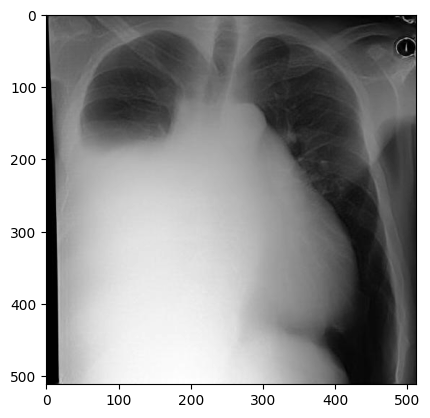

In [8]:
filepath = 'output/' + fname
img = plt.imread(filepath)

plt.imshow(img, cmap='gray')
plt.show()

## Generate Training Data

- Big right-sided pleural effusion

In [7]:
url = 'https://drive.google.com/file/d/1jHR6uan13m_frePZ9xuZFNfsPdLIAv_D/view?usp=drive_link'
output = 'inference_n.json'
gdown.download(url, output, quiet=False, fuzzy=True)
!mv inference_n.json configs/

Downloading...
From: https://drive.google.com/uc?id=1jHR6uan13m_frePZ9xuZFNfsPdLIAv_D
To: /mount/src/MONAI/AOCR2024/CXR/GenerativeModels/model-zoo/models/cxr_image_synthesis_latent_diffusion_model/inference_n.json
100%|██████████| 3.99k/3.99k [00:00<00:00, 18.6MB/s]


'inference_n.json'

In [9]:
!rm -r output/*
!mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [20]:
!python -m monai.bundle run save_jpg --config_file configs/inference_n.json \
        --prompt "Big right-sided pleural effusion" \
        --n_imgs 50

2024-03-07 04:52:56,802 - INFO - --- input summary of monai.bundle.scripts.run ---
2024-03-07 04:52:56,802 - INFO - > config_file: 'configs/inference_n.json'
2024-03-07 04:52:56,802 - INFO - > run_id: 'save_jpg'
2024-03-07 04:52:56,802 - INFO - > prompt: 'Big right-sided pleural effusion'
2024-03-07 04:52:56,802 - INFO - > n_imgs: 50
2024-03-07 04:52:56,802 - INFO - ---


/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.bundle.workflows ConfigWorkflow.__init__:workflow_type: Current default value of argument `workflow_type=None` has been deprecated since version 1.2. It will be changed to `workflow_type=train` in version 1.4.
  warn_deprecated(argname, msg, warning_category)
2024-03-07 04:52:56,802 - INFO - Setting logging properties based on config: configs/logging.conf.
100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 48.09it/s]


In [24]:
!mkdir dataset/1
!mv output/* dataset/1/

- Small right-sided pleural effusion

In [25]:
!python -m monai.bundle run save_jpg --config_file configs/inference_n.json \
        --prompt "Small right-sided pleural effusion" \
        --n_imgs 50

2024-03-07 04:58:29,096 - INFO - --- input summary of monai.bundle.scripts.run ---
2024-03-07 04:58:29,096 - INFO - > config_file: 'configs/inference_n.json'
2024-03-07 04:58:29,096 - INFO - > run_id: 'save_jpg'
2024-03-07 04:58:29,096 - INFO - > prompt: 'Small right-sided pleural effusion'
2024-03-07 04:58:29,096 - INFO - > n_imgs: 50
2024-03-07 04:58:29,096 - INFO - ---


/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.bundle.workflows ConfigWorkflow.__init__:workflow_type: Current default value of argument `workflow_type=None` has been deprecated since version 1.2. It will be changed to `workflow_type=train` in version 1.4.
  warn_deprecated(argname, msg, warning_category)
2024-03-07 04:58:29,096 - INFO - Setting logging properties based on config: configs/logging.conf.
100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 48.02it/s]


In [26]:
!mkdir dataset/2
!mv output/* dataset/2/

## Training

In [1]:
%cd GenerativeModels/model-zoo/models/cxr_image_synthesis_latent_diffusion_model/
import gdown

url = 'https://drive.google.com/file/d/1_yJkKyzYwpiQUytoKhUjmtnJ3jxKdejO/view?usp=drive_link'
output = 'cxr_train.py'
gdown.download(url, output, quiet=False, fuzzy=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/mount/src/MONAI/AOCR2024/CXR/GenerativeModels/model-zoo/models/cxr_image_synthesis_latent_diffusion_model


Downloading...
From (original): https://drive.google.com/uc?id=1_yJkKyzYwpiQUytoKhUjmtnJ3jxKdejO
From (redirected): https://drive.usercontent.google.com/download?id=1_yJkKyzYwpiQUytoKhUjmtnJ3jxKdejO&confirm=t&uuid=43936fef-0007-4305-9478-5d339777fc8a
To: /mount/src/MONAI/AOCR2024/CXR/GenerativeModels/model-zoo/models/cxr_image_synthesis_latent_diffusion_model/cxr_train.py
100%|██████████| 7.29k/7.29k [00:00<00:00, 67.3MB/s]


'cxr_train.py'

In [2]:
from cxr_train import CXR_demo

max_epoch = 50
class1_path = 'dataset/1/'
class2_path = 'dataset/2/'
cxr_demo = CXR_demo()

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cxr_demo.train(class1_path, class2_path, max_epoch)

Loading dataset: 100%|██████████| 20/20 [00:00<00:00, 394.95it/s]


----------
epoch 1/50
epoch 1 average loss: 0.6960
saved new best metric model
current epoch: 1 current AUC: 0.3000 current accuracy: 0.5000 best AUC: 0.5000 at epoch: 1
----------
epoch 2/50
epoch 2 average loss: 0.6572
current epoch: 2 current AUC: 0.6400 current accuracy: 0.5000 best AUC: 0.5000 at epoch: 1
----------
epoch 3/50
epoch 3 average loss: 0.6321
current epoch: 3 current AUC: 0.7600 current accuracy: 0.5000 best AUC: 0.5000 at epoch: 1
----------
epoch 4/50
epoch 4 average loss: 0.6036
saved new best metric model
current epoch: 4 current AUC: 0.7800 current accuracy: 0.6000 best AUC: 0.6000 at epoch: 4
----------
epoch 5/50
epoch 5 average loss: 0.5796
current epoch: 5 current AUC: 0.8100 current accuracy: 0.6000 best AUC: 0.6000 at epoch: 4
----------
epoch 6/50
epoch 6 average loss: 0.5592
current epoch: 6 current AUC: 0.8300 current accuracy: 0.6000 best AUC: 0.6000 at epoch: 4
----------
epoch 7/50
epoch 7 average loss: 0.5377
saved new best metric model
current epoch

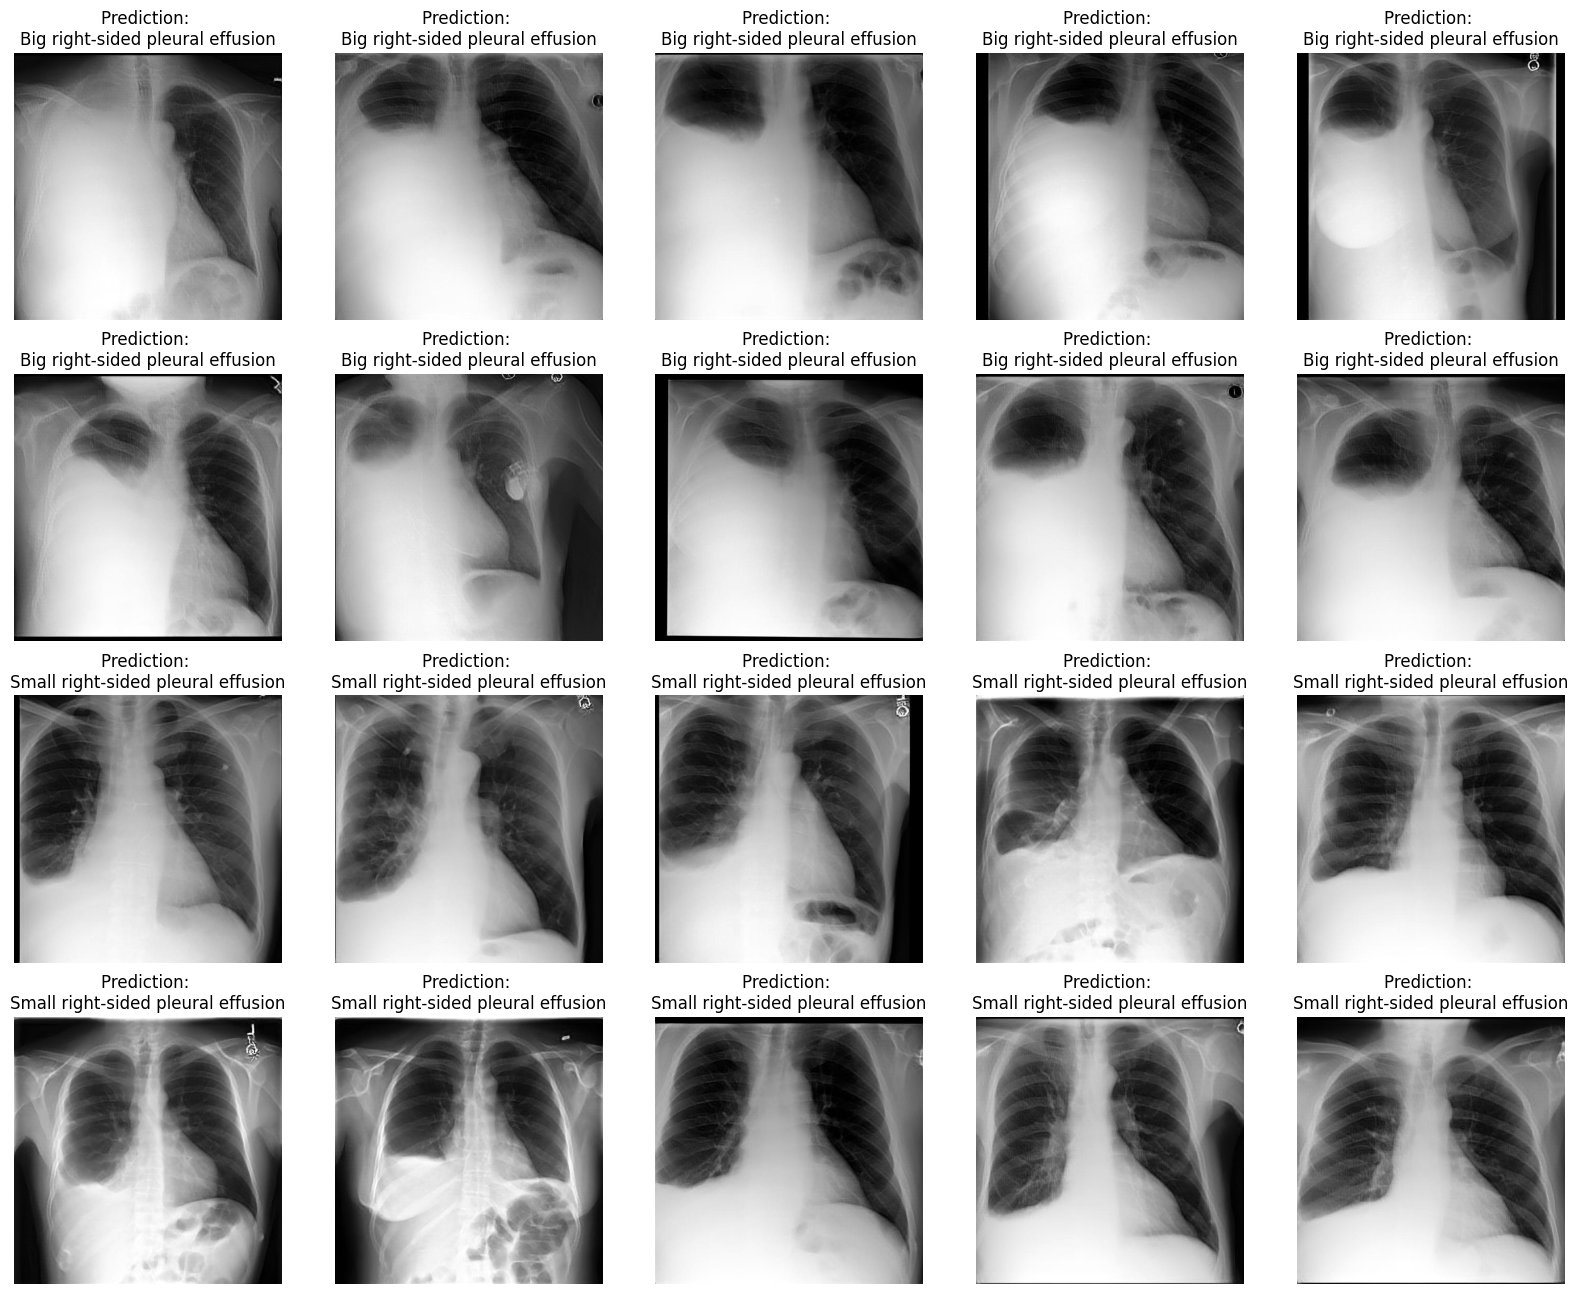

In [3]:
cxr_demo.vis_result('models/best.pth')

In [10]:
# data
class1_path = 'dataset/1/'
class2_path = 'dataset/2/'
fpath1 = [f for f in os.listdir(class1_path) if 'ipynb' not in f]
fpath2 = [f for f in os.listdir(class2_path) if 'ipynb' not in f]
data_train = [{'image':class1_path+f, 'label':0} for f in fpath1[:40]]
data_train += [{'image':class2_path+f, 'label':1} for f in fpath2[:40]]
data_valid = [{'image':class1_path+f, 'label':0} for f in fpath1[40:]]
data_valid += [{'image':class2_path+f, 'label':1} for f in fpath2[40:]]

In [11]:
spatial_size = (512, 512)
keys = 'image'
prob = 0.5
trans = monai.transforms.Compose([monai.transforms.LoadImaged(keys), # I/O
                                  monai.transforms.EnsureChannelFirstd(keys), # Pre-processing
                                  monai.transforms.ToDeviced(keys, device='cuda'),
#                                   monai.transforms.Resized(keys, spatial_size=spatial_size, mode=['area']), # Pre-processing
                                  monai.transforms.NormalizeIntensityd(keys=keys), # Pre-processing
                                  monai.transforms.RandAdjustContrastd(keys=keys, gamma=(0.8, 3.0), prob=prob), # Augmentation
                                  monai.transforms.RandFlipd(keys, prob=prob), # Augmentation
                                 ])
val_trans = monai.transforms.Compose([monai.transforms.LoadImaged(keys), # I/O
                                      monai.transforms.EnsureChannelFirstd(keys), # Pre-processing
                                      monai.transforms.ToDeviced(keys, device='cuda'),
#                                       monai.transforms.Resized(keys, spatial_size=spatial_size, mode=['area']), # Pre-processing
                                      monai.transforms.NormalizeIntensityd(keys=keys), # Pre-processing
                                     ])

y_trans = monai.transforms.Activations(sigmoid=True)

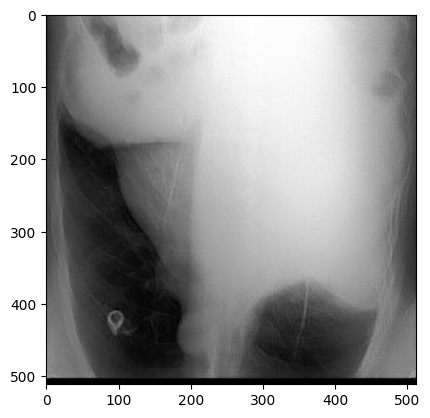

torch.Size([1, 512, 512])

In [12]:
test = trans(data_train[0])
plt.imshow(test['image'].cpu().numpy()[0].transpose([1, 0]), cmap='gray')
plt.show()
test['image'].shape

In [13]:
batch_size = 10

ds_train = monai.data.CacheDataset(data_train, transform=trans)
dl_train = torch.utils.data.DataLoader(ds_train, batch_size=batch_size, shuffle=True)

ds_valid = monai.data.CacheDataset(data_valid, transform=val_trans)
dl_valid = torch.utils.data.DataLoader(ds_valid, batch_size=batch_size)

Loading dataset: 100%|██████████| 20/20 [00:00<00:00, 100.38it/s]


In [15]:
device = 'cuda'
model = monai.networks.nets.DenseNet121(spatial_dims=2, in_channels=1,out_channels=1).to(device)
loss_function = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-5)
max_epochs = 50
val_interval = 1
auc_metric = monai.metrics.ROCAUCMetric()

In [18]:
best_metric = -1
best_metric_epoch = -1
epoch_loss_values = []
metric_values = []
th = 0.5

for epoch in range(max_epochs):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{max_epochs}")
    model.train()
    epoch_loss = 0
    step = 0
    for batch_data in dl_train:
        step += 1
        inputs, labels = batch_data['image'].to(device), batch_data['label'].to(device).float()[:, None]
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(
            f"{step}/{len(ds_train) // dl_train.batch_size}, "
            f"train_loss: {loss.item():.4f}")
        epoch_len = len(ds_train) // dl_train.batch_size
    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            y_pred = torch.tensor([], dtype=torch.float32, device=device)
            y = torch.tensor([], dtype=torch.long, device=device)
            for val_data in dl_valid:
                val_images, val_labels = val_data['image'].to(device), val_data['label'].to(device)
                y_pred = torch.cat([y_pred, model(val_images)], dim=0)
                y = torch.cat([y, val_labels], dim=0)
            y_pred_act = [y_trans(i) for i in y_pred]
            auc_metric(y_pred_act, y)
            result = auc_metric.aggregate()
            auc_metric.reset()
            metric_values.append(result)
            acc_value = torch.eq(torch.concat(y_pred_act)>th, y)
            acc_metric = acc_value.sum().item() / len(acc_value)
            if acc_metric > best_metric:
                best_metric = result
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), os.path.join(
                    'models', "best.pth"))
                print("saved new best metric model")
            print(
                f"current epoch: {epoch + 1} current AUC: {result:.4f}"
                f" current accuracy: {acc_metric:.4f}"
                f" best AUC: {best_metric:.4f}"
                f" at epoch: {best_metric_epoch}"
            )

----------
epoch 1/50
1/8, train_loss: 0.1230
2/8, train_loss: 0.0996
3/8, train_loss: 0.1962
4/8, train_loss: 0.0765
5/8, train_loss: 0.0728
6/8, train_loss: 0.0817
7/8, train_loss: 0.0989
8/8, train_loss: 0.2209
epoch 1 average loss: 0.1212
saved new best metric model
current epoch: 1 current AUC: 1.0000 current accuracy: 1.0000 best AUC: 1.0000 at epoch: 1
----------
epoch 2/50
1/8, train_loss: 0.1285
2/8, train_loss: 0.2801
3/8, train_loss: 0.4472
4/8, train_loss: 0.4805
5/8, train_loss: 0.2151
6/8, train_loss: 0.1321
7/8, train_loss: 0.0865
8/8, train_loss: 0.1033
epoch 2 average loss: 0.2342
current epoch: 2 current AUC: 1.0000 current accuracy: 1.0000 best AUC: 1.0000 at epoch: 1
----------
epoch 3/50
1/8, train_loss: 0.2090
2/8, train_loss: 0.0911
3/8, train_loss: 0.2039
4/8, train_loss: 0.2240
5/8, train_loss: 0.2516
6/8, train_loss: 0.1435
7/8, train_loss: 0.0588
8/8, train_loss: 0.1503
epoch 3 average loss: 0.1665
current epoch: 3 current AUC: 1.0000 current accuracy: 1.0000

KeyboardInterrupt: 

## Evaluation

In [32]:
label_keys = {0:'Big right-sided pleural effusion', 1:'Small right-sided pleural effusion'}
best_path = 'models/best.pth'
state_dict = torch.load(best_path)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [34]:
model.eval()
th = 0.5
with torch.no_grad():
    y_pred = torch.tensor([], dtype=torch.float32, device=device)
    y = torch.tensor([], dtype=torch.long, device=device)
    images = torch.tensor([], dtype=torch.float32, device=device)
    for val_data in dl_valid:
        val_images, val_labels = val_data['image'].to(device), val_data['label'].to(device)
        y_pred = torch.cat([y_pred, model(val_images)], dim=0)
        y = torch.cat([y, val_labels], dim=0)
        images = torch.cat([images, val_images], dim=0)
    y_pred_act = [(y_trans(i)>th).int().detach().cpu().numpy() for i in y_pred]
    images = images.detach().cpu().numpy()

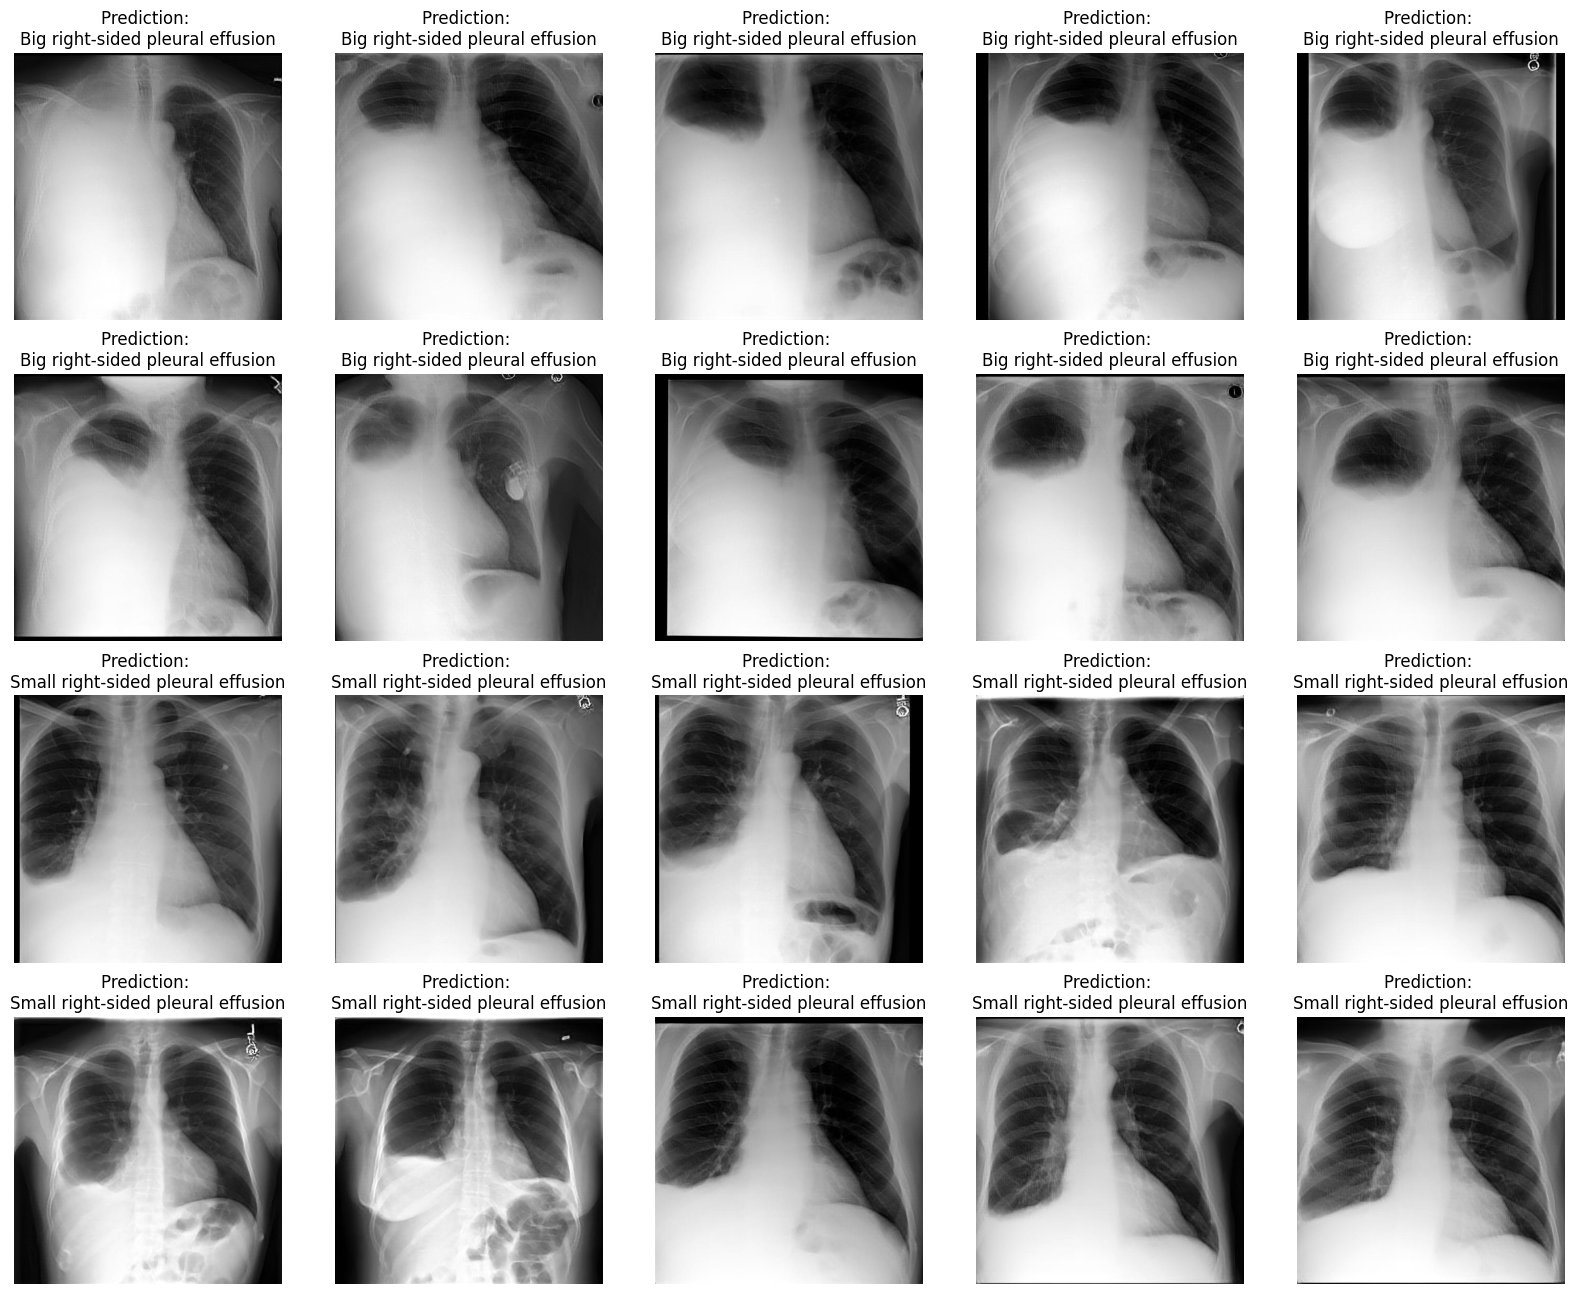

In [43]:
plt.figure(figsize=(20, 16))
i = 1
for p, im in zip(y_pred_act, images):
    plt.subplot(4, 5, i)
    i += 1
    plt.imshow(im[0].transpose([1, 0]), cmap='gray')
    plt.title('Prediction: \n'+label_keys[p[0]])
    plt.axis('off')
plt.show()